<a href="https://colab.research.google.com/github/DKAbir111/Artificial-Intelligence/blob/main/Only%20Deep.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

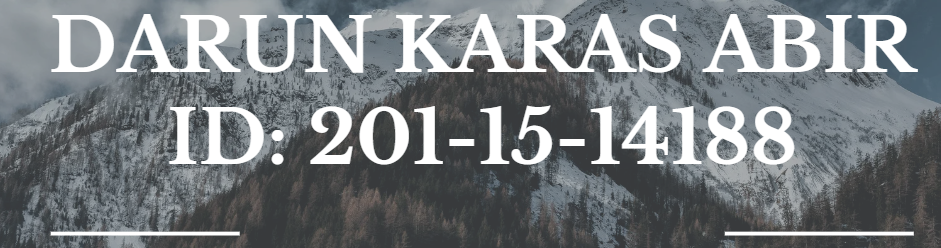

In [ ]:
# Importing necessary libraries
import numpy as np  # NumPy for numerical operations
import pandas as pd  # Pandas for data manipulation
import matplotlib.pyplot as plt  # Matplotlib for basic plotting
import seaborn as sns  # Seaborn for statistical data visualization
import warnings  # Warnings library for managing warnings during code execution

# Suppressing warning messages to keep the output clean
warnings.filterwarnings("ignore")

**Read the parquet type data file**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Reading training data from a Parquet file into a pandas DataFrame
data_train=pd.read_parquet('/content/drive/MyDrive/Data set of ML/UNSW_NB15_training-set.parquet')
# Reading testing data from a Parquet file into a pandas DataFrame
data_test=pd.read_parquet('/content/drive/MyDrive/Data set of ML/UNSW_NB15_testing-set.parquet')

In [ ]:
data_train.head(5)# Displaying the first 5 rows of the training data DataFrame

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.09375,180363632.0,...,0,0,1,1,0,0,0,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.00000,881000000.0,...,0,0,1,1,0,0,0,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.00000,854400000.0,...,0,0,1,1,0,0,0,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.65625,600000000.0,...,0,0,2,1,0,0,0,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.00000,850400000.0,...,0,0,2,1,0,0,0,0,Normal,0


In [ ]:
data_test.tail(5)# Displaying the last 5 rows of the testing data DataFrame

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
175336,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,24,13,0,0,0,0,Generic,1
175337,0.505762,tcp,-,FIN,10,8,620,354,33.612648,8.826286e+03,...,0,0,1,1,0,0,0,0,Shellcode,1
175338,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,3,3,0,0,0,0,Generic,1
175339,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,30,14,0,0,0,0,Generic,1
175340,0.000009,udp,dns,INT,2,0,114,0,111111.109375,5.066666e+07,...,0,0,30,16,0,0,0,0,Generic,1


# **Exploratory Data Analysis**

In [ ]:
print(data_train.shape)#Shape of Training data set
print(data_test.shape)#Shape of Testing data set

(82332, 36)
(175341, 36)


Here we can see testing data set is bigger than training data. So-
1. We can convert traing data into testing and vice versa.
2. Or concatanate the data into one variable then split it into training and testing set according to our requirements.

In [ ]:
data_train, data_test = data_test, data_train #Reverse the data set
print(np.shape(data_train))#New training data shape
print(np.shape(data_test))#New training data shape

(175341, 36)
(82332, 36)


I think the best solution will be if we concatenate the data and split it randomly into 80% for training data and 20% for testing data.

Note: In pandas axis = 0 refers to horizontal axis or rows and axis = 1 refers to vertical axis or columns

In [ ]:
data=pd.concat([data_train,data_test],axis=0)#concatenate the data
data.shape# Retrieving the shape (number of rows and columns) of the DataFrame 'data'

(257673, 36)

In [ ]:
data.sample(5)# Randomly sampling 5 rows from the DataFrame 'data'

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
117211,0.000010,udp,dns,INT,2,0,114,0,100000.000000,4.560000e+07,...,0,0,8,8,0,0,0,0,Generic,1
114104,0.196966,tcp,http,FIN,14,6,6676,268,96.463348,2.518201e+05,...,1,0,1,1,0,0,1,0,DoS,1
11257,2.125603,tcp,pop3,FIN,34,118,1582,132784,71.038666,5.780948e+03,...,0,0,1,1,0,0,0,0,Exploits,1
130138,0.000001,udp,dns,INT,2,0,114,0,1000000.000000,4.560000e+08,...,0,0,18,11,0,0,0,0,Generic,1
79804,0.000001,udp,-,INT,2,0,1066,0,1000000.000000,4.264000e+09,...,0,0,1,1,0,0,0,0,Fuzzers,1


In [ ]:
data.dtypes# Retrieving the data types of each column in the DataFrame 'data'

dur                   float32
proto                  object
service              category
state                  object
spkts                   int16
dpkts                   int16
sbytes                  int32
dbytes                  int32
rate                  float32
sload                 float32
dload                 float32
sloss                   int16
dloss                   int16
sinpkt                float32
dinpkt                float32
sjit                  float32
djit                  float32
swin                    int16
stcpb                   int64
dtcpb                   int64
dwin                    int16
tcprtt                float32
synack                float32
ackdat                float32
smean                   int16
dmean                   int16
trans_depth             int16
response_body_len       int32
ct_src_dport_ltm         int8
ct_dst_sport_ltm         int8
is_ftp_login             int8
ct_ftp_cmd               int8
ct_flw_http_mthd         int8
is_sm_ips_

In [ ]:
data.isnull().sum().to_frame(name='Null Count') #Checking the null value if any

,Null Count
dur,0
proto,0
service,0
state,0
spkts,0
dpkts,0
sbytes,0
dbytes,0
rate,0
sload,0


In [ ]:
data.info# Displaying concise information about the DataFrame 'data'

<bound method DataFrame.info of             dur proto service state  spkts  dpkts  sbytes  dbytes  \
0      0.121478   tcp       -   FIN      6      4     258     172   
1      0.649902   tcp       -   FIN     14     38     734   42014   
2      1.623129   tcp       -   FIN      8     16     364   13186   
3      1.681642   tcp     ftp   FIN     12     12     628     770   
4      0.449454   tcp       -   FIN     10      6     534     268   
...         ...   ...     ...   ...    ...    ...     ...     ...   
82327  0.000005   udp       -   INT      2      0     104       0   
82328  1.106101   tcp       -   FIN     20      8   18062     354   
82329  0.000000   arp       -   INT      1      0      46       0   
82330  0.000000   arp       -   INT      1      0      46       0   
82331  0.000009   udp       -   INT      2      0     104       0   

                rate         sload  ...  trans_depth  response_body_len  \
0          74.087486  1.415894e+04  ...            0            

In [ ]:
data.describe()# Generating descriptive statistics for the DataFrame 'data'

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,257673.000000,2.576730e+05,2.576730e+05,257673.000000,257673.000000,...,257673.000000,257673.000000,2.576730e+05,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,91253.921875,7.060869e+07,6.582142e+05,4.889317,6.743691,...,121.649703,0.102242,1.968900e+03,5.238271,4.032677,0.012819,0.012850,0.132005,0.014274,0.639077
std,5.974306,135.947152,111.985965,1.737739e+05,1.461993e+05,160344.640625,1.857312e+08,2.412372e+06,65.574953,53.702222,...,254.041013,0.710593,4.962523e+04,8.160822,5.831515,0.116091,0.116421,0.681854,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,30.789276,1.231800e+04,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2955.664795,7.439423e+05,1.747441e+03,0.000000,0.000000,...,44.000000,0.000000,0.000000e+00,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,125000.000000,8.000000e+07,2.210538e+04,3.000000,2.000000,...,89.000000,0.000000,0.000000e+00,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1000000.000000,5.988000e+09,2.242273e+07,5319.000000,5507.000000,...,1500.000000,172.000000,6.558056e+06,59.000000,46.000000,4.000000,4.000000,30.000000,1.000000,1.000000


In [ ]:
data.corr()#calculate the pairwise correlation of columns

,dur,spkts,dpkts,sbytes,dbytes,rate,sload,dload,sloss,dloss,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,label
dur,1.000000,0.258890,0.188382,0.204422,0.149705,-0.118622,-0.079202,-0.049026,0.207223,0.148506,...,0.029999,0.003041,0.078497,-0.090267,-0.088422,0.020390,0.020330,0.023299,0.034025,0.029096
spkts,0.258890,1.000000,0.383221,0.964393,0.203804,-0.073668,-0.049232,0.075482,0.971859,0.204711,...,0.147472,0.008288,0.085979,-0.063234,-0.066604,0.010114,0.010135,0.004430,-0.016565,-0.043040
dpkts,0.188382,0.383221,1.000000,0.184280,0.973445,-0.093065,-0.062484,0.137395,0.199640,0.979612,...,0.426542,0.028034,0.414217,-0.078324,-0.084943,0.013203,0.013231,0.039567,-0.019895,-0.097394
sbytes,0.204422,0.964393,0.184280,1.000000,0.009969,-0.027353,-0.017320,-0.007372,0.995772,0.006907,...,-0.004396,0.002648,0.001631,-0.024496,-0.024965,-0.003931,-0.003929,-0.002900,-0.005903,0.019376
dbytes,0.149705,0.203804,0.973445,0.009969,1.000000,-0.055538,-0.037318,0.103487,0.016448,0.996711,...,0.405260,0.029853,0.441155,-0.046258,-0.050583,-0.009145,-0.009139,0.042458,-0.011842,-0.060403
rate,-0.118622,-0.073668,-0.093065,-0.027353,-0.055538,1.000000,0.587503,-0.148204,-0.041993,-0.070734,...,-0.268470,-0.081732,-0.022513,0.350931,0.383672,-0.062572,-0.062543,-0.110000,-0.068433,0.335883
sload,-0.079202,-0.049232,-0.062484,-0.017320,-0.037318,0.587503,1.000000,-0.101924,-0.027949,-0.047537,...,-0.181026,-0.054610,-0.015076,0.104451,0.083601,-0.041925,-0.041906,-0.073513,-0.045732,0.165249
dload,-0.049026,0.075482,0.137395,-0.007372,0.103487,-0.148204,-0.101924,1.000000,0.008457,0.121203,...,0.547562,-0.027966,0.024802,-0.133032,-0.141630,-0.025128,-0.025078,-0.039760,-0.032833,-0.352169
sloss,0.207223,0.971859,0.199640,0.995772,0.016448,-0.041993,-0.027949,0.008457,1.000000,0.016885,...,0.016252,0.002729,-0.001811,-0.036784,-0.038239,0.005597,0.005599,-0.002803,-0.008969,0.001828
dloss,0.148506,0.204711,0.979612,0.006907,0.996711,-0.070734,-0.047537,0.121203,0.016885,1.000000,...,0.413946,0.027479,0.431519,-0.059463,-0.064579,0.007607,0.007615,0.040078,-0.015111,-0.075961


In [ ]:
data['attack_cat'].unique()# Retrieving unique values in the 'attack_cat' column

['Normal', 'Backdoor', 'Analysis', 'Fuzzers', 'Shellcode', 'Reconnaissance', 'Exploits', 'DoS', 'Worms', 'Generic']
Categories (10, object): ['Analysis', 'Backdoor', 'DoS', 'Exploits', ..., 'Normal', 'Reconnaissance',
                          'Shellcode', 'Worms']

# **Visualizing Unique Class in Diffrent Column**

In [ ]:
# Function to plot a bar graph of value counts for a given feature
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")

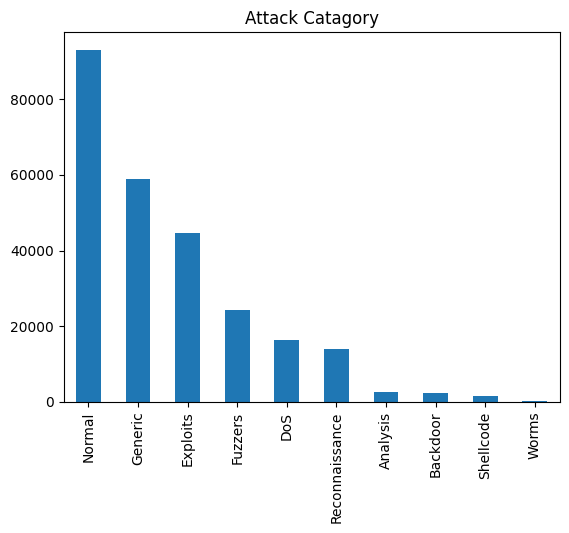

In [ ]:
plt.title("Attack Catagory")# Setting the title for the bar graph
bar_graph('attack_cat')# Calling the bar_graph function to plot value counts for the 'attack_cat' column

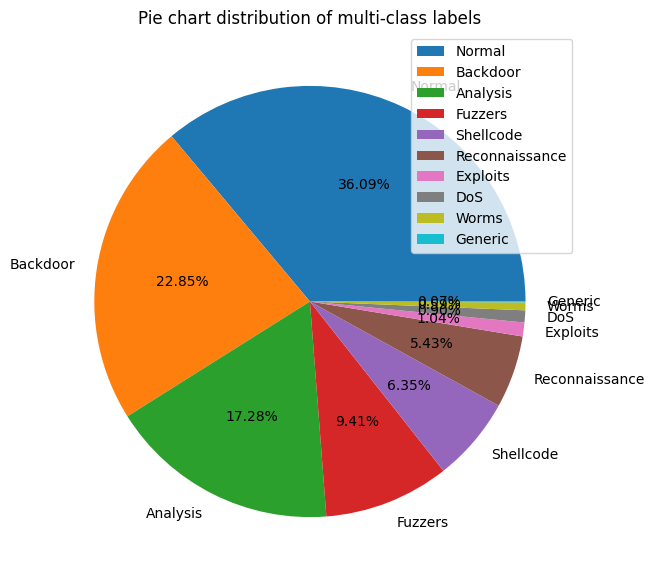

In [ ]:
# Setting the figure size for the pie chart
plt.figure(figsize=(15, 7))

# Creating a pie chart based on the value counts of 'attack_cat'
plt.pie(data['attack_cat'].value_counts(), labels=data['attack_cat'].unique(), autopct='%0.2f%%')

# Setting the title for the pie chart
plt.title('Pie chart distribution of multi-class labels')

# Adding a legend to the pie chart
plt.legend()

# Saving the pie chart as an image file
plt.savefig('Pie_chart_multi.png')

# Displaying the pie chart
plt.show()

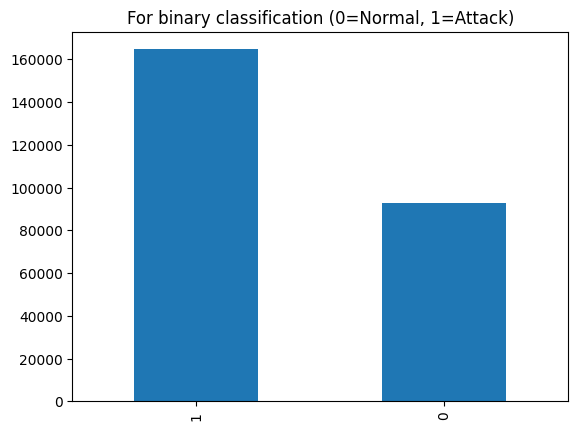

In [ ]:
# Setting the title for the binary classification bar graph
plt.title("For binary classification (0=Normal, 1=Attack)")

# Calling the bar_graph function to plot value counts for the 'label' column
bar_graph('label')  # 0=Normal, 1=Attack

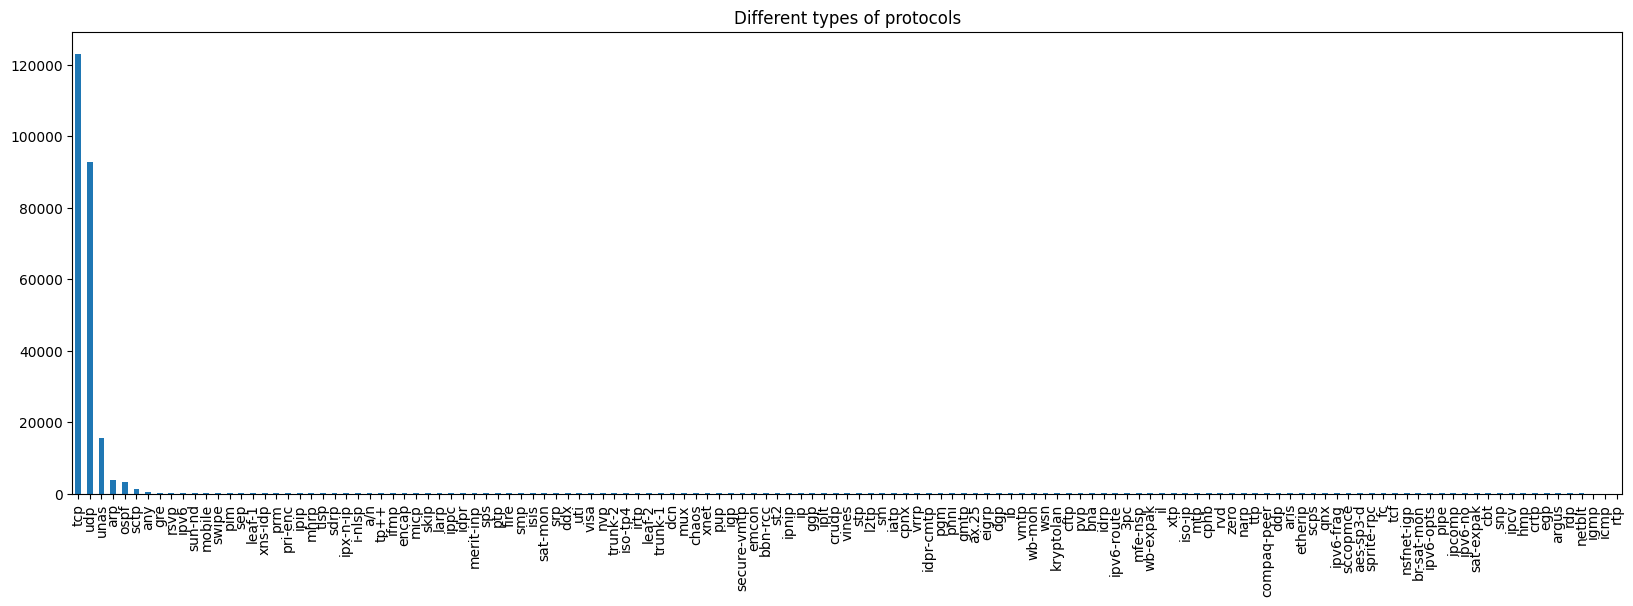

In [ ]:
# Setting the figure size for the protocol distribution bar graph
plt.figure(figsize=(20, 6))

# Setting the title for the protocol distribution bar graph
plt.title("Different types of protocols")

# Calling the bar_graph function to plot value counts for the 'proto' column
bar_graph('proto')

# **Heat Map with Corelational Matrix**

In [ ]:
# Importing the LabelEncoder class from scikit-learn for categorical variable encoding
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Creating a copy of the DataFrame for heatmap visualization
heatmap = data.copy()

# List of categorical columns to be encoded
cat_cols = ["proto", "service", "state", "attack_cat"]

# Initializing a LabelEncoder
le = LabelEncoder()

# Encoding categorical columns in the DataFrame
for col in cat_cols:
    heatmap[col] = le.fit_transform(heatmap[col])

# Selecting a subset of columns for further analysis
dummy = heatmap[["dur", "proto", "service", "state", "spkts", "dpkts", "sbytes", "dbytes", "attack_cat"]]


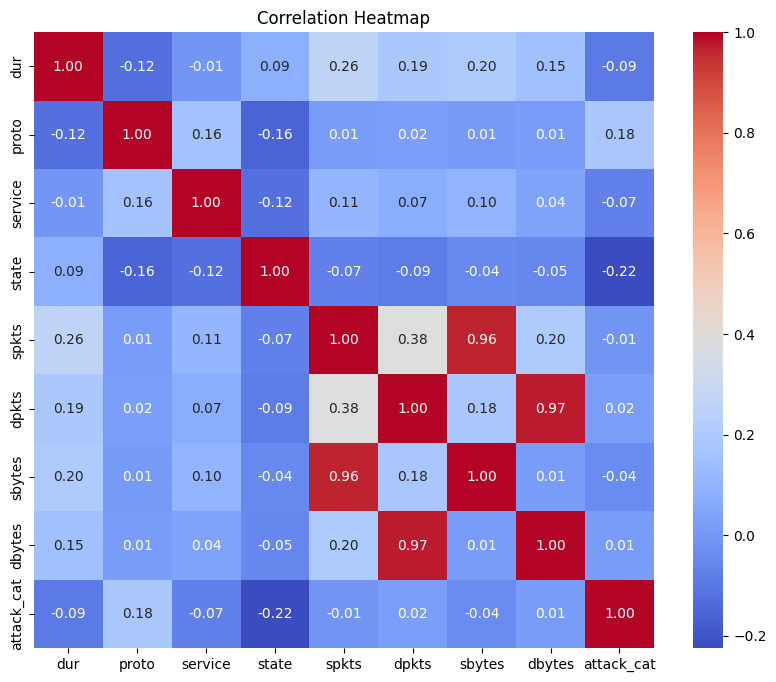

In [ ]:
# Creating a correlation matrix from the selected columns in the DataFrame 'dummy'
correlation_matrix = dummy.corr()

# Setting the figure size for the correlation heatmap
plt.figure(figsize=(10, 8))

# Creating a heatmap with annotations, using the 'coolwarm' colormap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Setting the title for the correlation heatmap
plt.title("Correlation Heatmap")

# Displaying the correlation heatmap
plt.show()


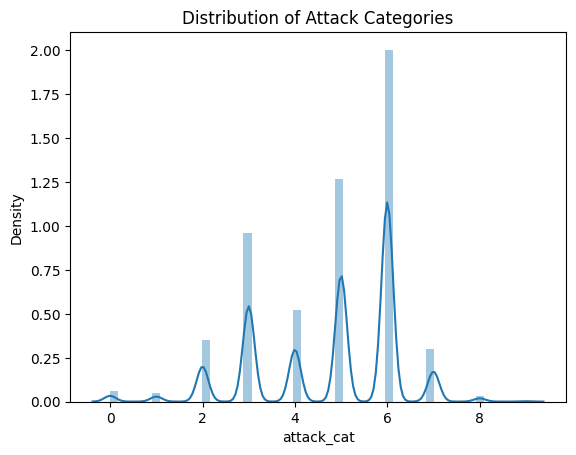

In [ ]:
# Creating a distribution plot for the 'attack_cat' column
sns.distplot(dummy['attack_cat'])

# Setting the title for the distribution plot
plt.title('Distribution of Attack Categories')

# Displaying the plot
plt.show()

<Axes: xlabel='attack_cat', ylabel='Density'>

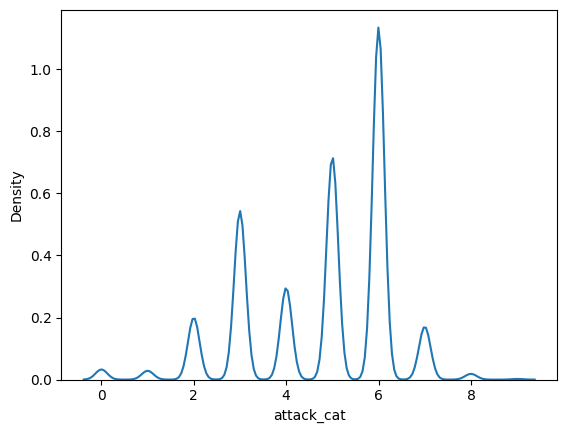

In [ ]:
# Creating a kernel density estimate plot without the histogram for the 'attack_cat' column
sns.distplot(dummy['attack_cat'],hist=False)

In [ ]:
print(dummy["attack_cat"].skew()) #(SKEWNESS)-A negative skewness indicates that the left tail of the distribution is longer or fatter than the right tail.
print(dummy['attack_cat'].kurt()) #KURTOSIS- A negative kurtosis value indicates that the distribution has lighter or thinner tails and a flatter peak than the normal distribution.

-0.6794340701622984
-0.1561059781825742


In [ ]:
# sns.boxplot(dummy['proto'])

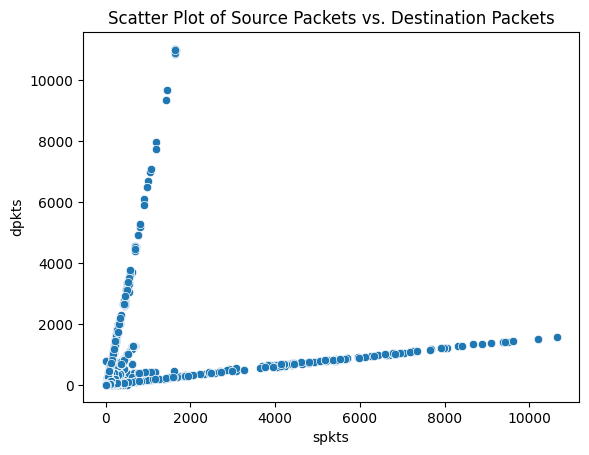

In [ ]:
# Creating a scatter plot for the relationship between 'spkts' and 'dpkts'
sns.scatterplot(x=data['spkts'], y=data['dpkts'])

# Setting the title for the scatter plot
plt.title('Scatter Plot of Source Packets vs. Destination Packets')

# Displaying the plot
plt.show()

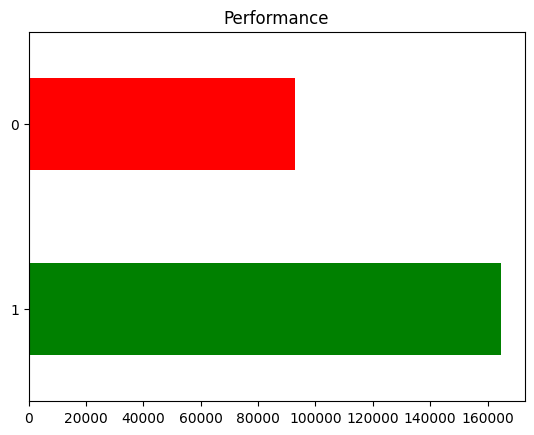

In [ ]:
# Creating a horizontal bar plot for the top 4 value counts in the 'label' column
data["label"].value_counts().nlargest(4).plot.barh(color=['green', 'red'], title='Performance')

# Displaying the plot
plt.show()

# **Feature Engineering**

In [ ]:
data.dtypes# Displaying the data types of each column in the DataFrame 'data'

dur                   float32
proto                  object
service              category
state                  object
spkts                   int16
dpkts                   int16
sbytes                  int32
dbytes                  int32
rate                  float32
sload                 float32
dload                 float32
sloss                   int16
dloss                   int16
sinpkt                float32
dinpkt                float32
sjit                  float32
djit                  float32
swin                    int16
stcpb                   int64
dtcpb                   int64
dwin                    int16
tcprtt                float32
synack                float32
ackdat                float32
smean                   int16
dmean                   int16
trans_depth             int16
response_body_len       int32
ct_src_dport_ltm         int8
ct_dst_sport_ltm         int8
is_ftp_login             int8
ct_ftp_cmd               int8
ct_flw_http_mthd         int8
is_sm_ips_

**LabelEncoding for predicted class**

In [ ]:
# Initializing a LabelEncoder
le = LabelEncoder()

# Transforming the 'attack_cat' column using LabelEncoder
data['attack_cat'] = le.fit_transform(data['attack_cat'])

**One hot Encoding**

In [ ]:
# Creating a new DataFrame 'df' by dropping the 'label' column from the original DataFrame 'data'
df = pd.DataFrame(data)
df = df.drop("label", axis=1)

In [ ]:
# Importing the OneHotEncoder from scikit-learn
from sklearn.preprocessing import OneHotEncoder

# Initializing a OneHotEncoder with specified parameters
ohe = OneHotEncoder(
    sparse=False,         # Whether to return a sparse matrix or not
    handle_unknown='error',  # How to handle unknown categories during transformation
    drop='first'           # Whether to drop the first column of each feature to avoid multicollinearity
)


In [ ]:
# Specify columns to be one-hot encoded
columns_to_encode = ['proto', 'service', 'state']
# Perform one-hot encoding and replace original columns
df[columns_to_encode] = df[columns_to_encode].apply(lambda x: pd.Categorical(x).codes)
#A lambda function (or lambda expression) is a concise way to represent an anonymous function. It is a function without a name.

In [ ]:
df #print the data frame df that is already encoded into numeric formet

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,dmean,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat
0,0.121478,113,0,4,6,4,258,172,74.087486,1.415894e+04,...,43,0,0,1,1,0,0,0,0,6
1,0.649902,113,0,4,14,38,734,42014,78.473373,8.395112e+03,...,1106,0,0,1,1,0,0,0,0,6
2,1.623129,113,0,4,8,16,364,13186,14.170161,1.572272e+03,...,824,0,0,1,1,0,0,0,0,6
3,1.681642,113,3,4,12,12,628,770,13.677108,2.740179e+03,...,64,0,0,1,1,1,1,0,0,6
4,0.449454,113,0,4,10,6,534,268,33.373825,8.561499e+03,...,45,0,0,2,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,0.000005,119,0,5,2,0,104,0,200000.000000,8.320000e+07,...,0,0,0,1,1,0,0,0,0,6
82328,1.106101,113,0,4,20,8,18062,354,24.410067,1.241044e+05,...,44,0,0,1,1,0,0,0,0,6
82329,0.000000,6,0,5,1,0,46,0,0.000000,0.000000e+00,...,0,0,0,1,1,0,0,0,1,6
82330,0.000000,6,0,5,1,0,46,0,0.000000,0.000000e+00,...,0,0,0,1,1,0,0,0,1,6


**Feature Selection**

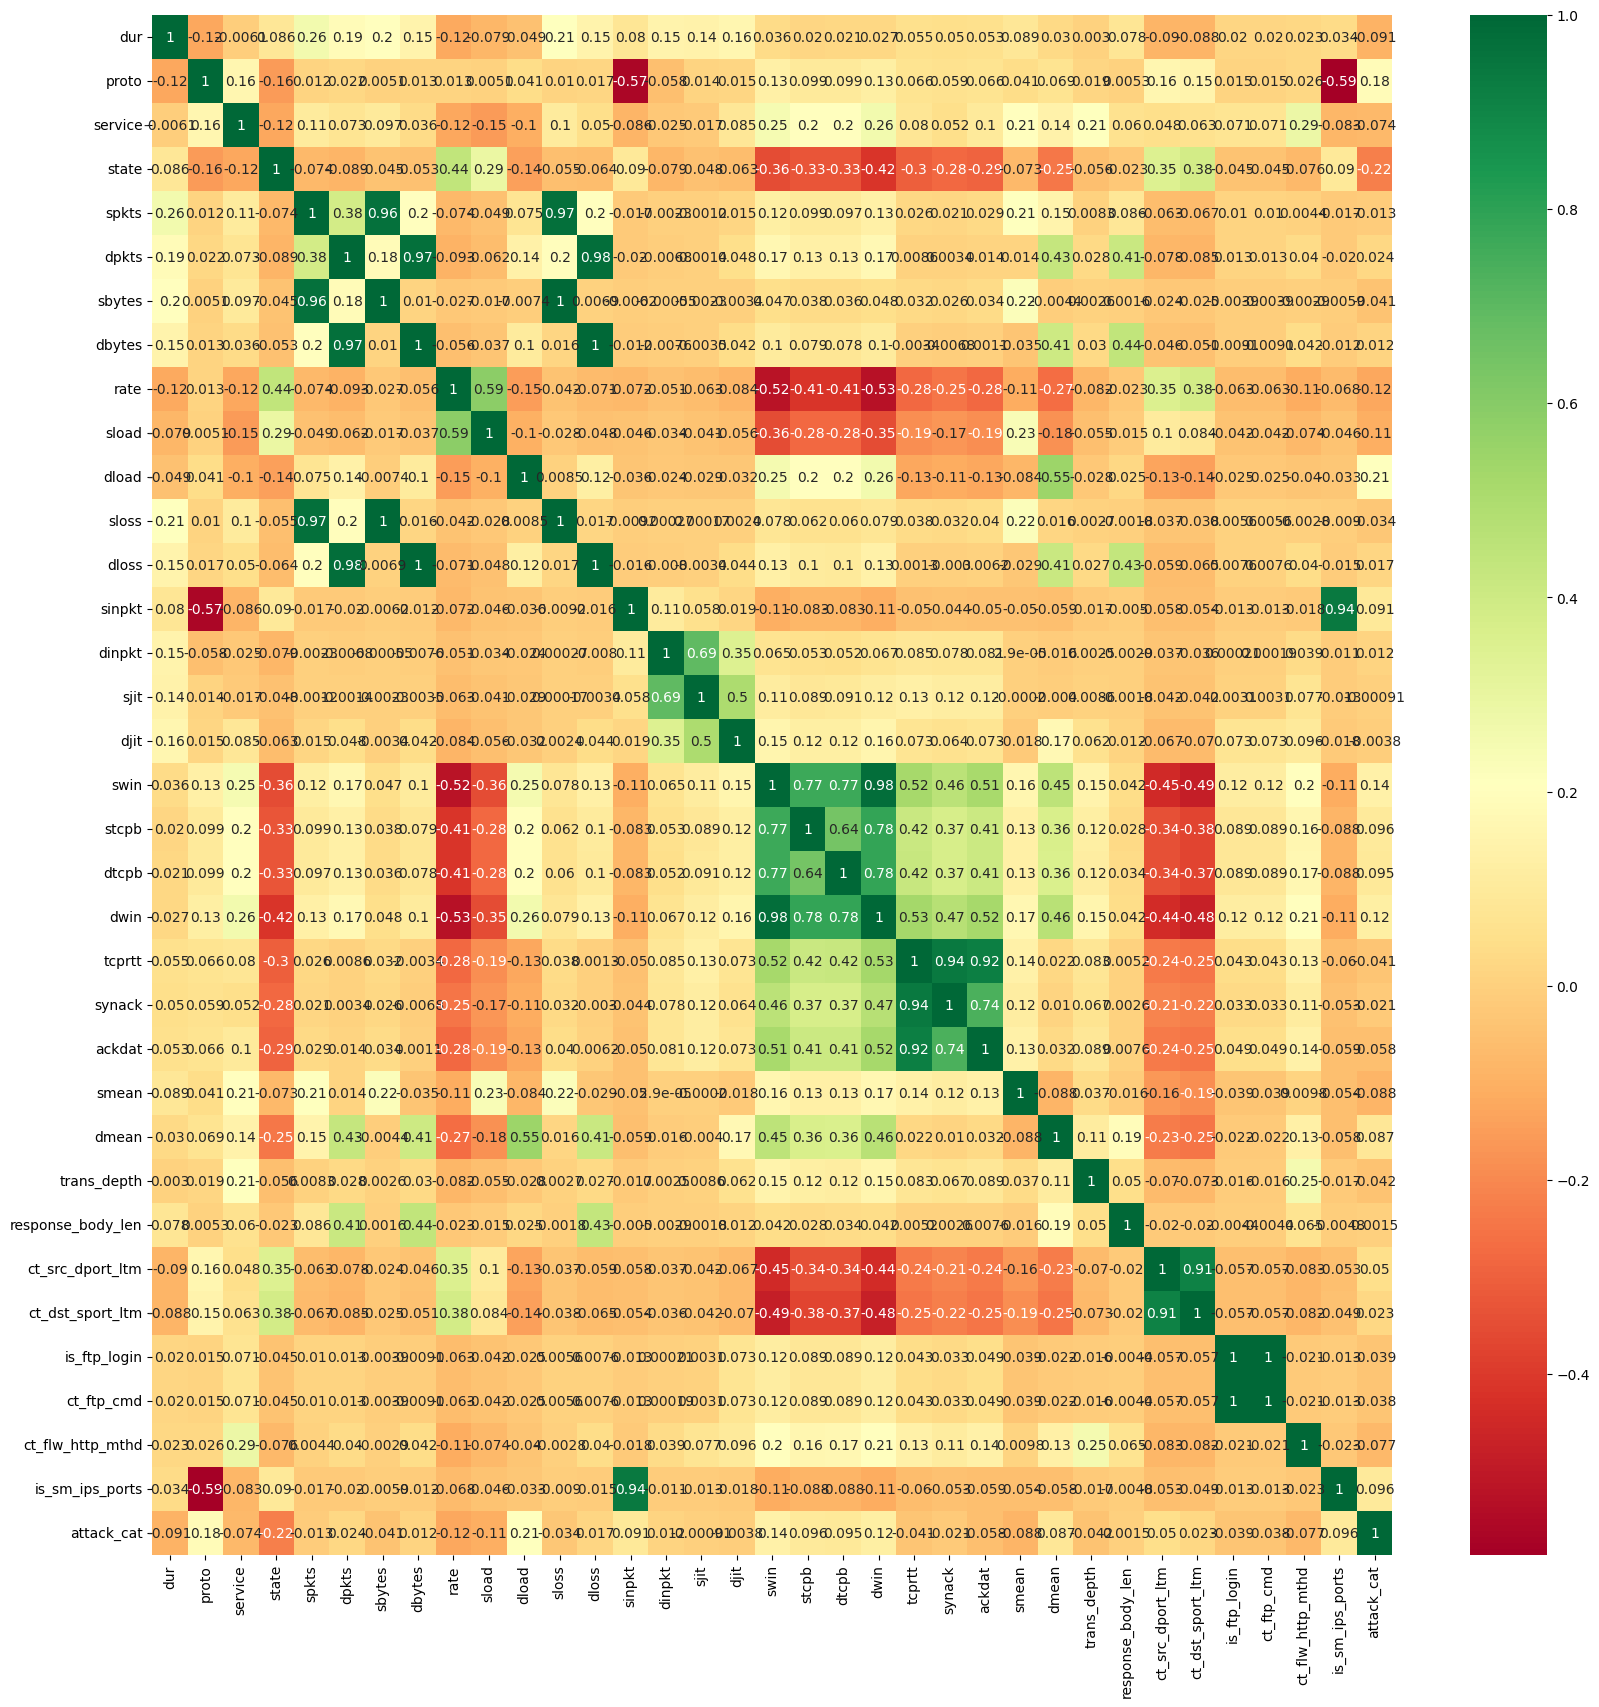

In [ ]:
# Creating a correlation matrix for the DataFrame 'df'
corrmat = df.corr()

# Selecting the index of the top correlated features
top_corr_features = corrmat.index

# Setting the figure size for the correlation heatmap
plt.figure(figsize=(20, 20))

# Plotting the heatmap with annotations
g = sns.heatmap(df[top_corr_features].corr(), annot=True, cmap="RdYlGn")

In [ ]:
# Retrieving the top 33 features with the highest correlation with the 'attack_cat' column
df.corr()['attack_cat'].nlargest(33)


attack_cat           1.000000
dload                0.208868
proto                0.183783
swin                 0.137248
dwin                 0.121688
is_sm_ips_ports      0.096422
stcpb                0.095716
dtcpb                0.094587
sinpkt               0.091132
dmean                0.086860
ct_src_dport_ltm     0.049673
dpkts                0.023630
ct_dst_sport_ltm     0.022948
dloss                0.016918
dbytes               0.012388
dinpkt               0.012317
response_body_len    0.001522
sjit                -0.000912
djit                -0.003805
spkts               -0.013261
synack              -0.021046
sloss               -0.033507
ct_ftp_cmd          -0.038460
is_ftp_login        -0.038784
tcprtt              -0.040747
sbytes              -0.041092
trans_depth         -0.042492
ackdat              -0.057948
service             -0.073654
ct_flw_http_mthd    -0.077164
smean               -0.088228
dur                 -0.091189
sload               -0.105646
Name: atta

In [ ]:
X = df.drop(['attack_cat'], axis=1) #independent columns
y = df['attack_cat']   #target column i.e price range

In [ ]:
# Import necessary libraries for feature selection
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Instantiate SelectKBest with the desired score function (f_classif in this case)
test = SelectKBest(score_func=f_classif)

# Fit SelectKBest on the features and target variable
test.fit(X, y)

# Extract the scores of the features
scores = pd.DataFrame(test.scores_)

# Create DataFrames for feature names and their corresponding scores
columns = pd.DataFrame(X.columns)
featureScores = pd.concat([columns, scores], axis=1)
featureScores.columns = ['Features', 'Score']


In [ ]:
# Print the top 33 features based on their scores
print(featureScores.nlargest(33, 'Score'))

            Features         Score
29  ct_dst_sport_ltm  67280.057785
28  ct_src_dport_ltm  44507.076258
17              swin  14006.156072
20              dwin  12911.279612
3              state  10981.619004
8               rate   7749.040792
18             stcpb   6776.138586
19             dtcpb   6757.825214
25             dmean   4583.702953
10             dload   4055.855920
23            ackdat   3355.248961
2            service   3351.574879
21            tcprtt   3334.566872
1              proto   2798.875245
22            synack   2535.498346
24             smean   2149.141887
32  ct_flw_http_mthd   1288.603448
9              sload   1161.056733
33   is_sm_ips_ports    753.383873
13            sinpkt    716.140348
0                dur    633.903157
30      is_ftp_login    431.791672
31        ct_ftp_cmd    429.494250
5              dpkts    421.503969
15              sjit    412.006284
26       trans_depth    384.930234
16              djit    301.653847
12             dloss

In [ ]:
 #Drop Unnecessary features based on feature importance score
X=X.drop(['stcpb','djit','swin','response_body_len','dinpkt','spkts','ct_ftp_cmd'],axis=1)

In [ ]:
X.columns

Index(['dur', 'proto', 'service', 'state', 'dpkts', 'sbytes', 'dbytes', 'rate',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'sjit', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'is_ftp_login',
       'ct_flw_http_mthd', 'is_sm_ips_ports'],
      dtype='object')

# **Scalling- Using Strandard Scaling**

**Split the data set into train set and testing set**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

# Print the shapes of the training and testing sets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (193254, 27)
Testing set shape: (64419, 27)


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()#x' = (x- mean)/std

# transform train and test sets
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [ ]:
X_train

array([[-0.2086412 ,  0.41500432, -0.6935882 , ..., -0.11150864,
        -0.19424949, -0.12098671],
       [-0.2086412 ,  0.46156993, -0.6935882 , ..., -0.11150864,
        -0.19424949, -0.12098671],
       [-0.18322756,  0.13561069, -0.6935882 , ..., -0.11150864,
        -0.19424949, -0.12098671],
       ...,
       [-0.18236575,  0.13561069, -0.6935882 , ..., -0.11150864,
        -0.19424949, -0.12098671],
       [-0.2086412 ,  0.46156993, -0.6935882 , ..., -0.11150864,
        -0.19424949, -0.12098671],
       [-0.20864187,  0.41500432,  0.19695151, ..., -0.11150864,
        -0.19424949, -0.12098671]])

In [ ]:
X_test

array([[-0.20864137, -2.47206318, -0.6935882 , ..., -0.11150864,
        -0.19424949, -0.12098671],
       [-0.18456879,  0.13561069, -0.6935882 , ..., -0.11150864,
        -0.19424949, -0.12098671],
       [-0.20864204,  0.41500432,  0.19695151, ..., -0.11150864,
        -0.19424949, -0.12098671],
       ...,
       [-0.20565183,  0.13561069, -0.6935882 , ..., -0.11150864,
        -0.19424949, -0.12098671],
       [-0.20864103,  0.41500432,  0.19695151, ..., -0.11150864,
        -0.19424949, -0.12098671],
       [-0.2086422 ,  0.41500432,  0.19695151, ..., -0.11150864,
        -0.19424949, -0.12098671]])

In [ ]:
# plt.figure(figsize=(16,5))
# plt.subplot(1,2,1)
# plt.scatter(X_train['proto'], X_train['service'])
# plt.xlabel('Protocol')
# plt.ylabel('Service')
# plt.title('Before Scaling')

# plt.subplot(1,2,2)
# plt.scatter(X_train_scaled['proto'], X_train_scaled['service'],color='red')
# plt.xlabel('Protocol')
# plt.ylabel('Service')
# plt.title('After Scaling')


# plt.show()



**Cross Validation**

In [ ]:
# Import necessary libraries for cross-validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression model
logr1 = LogisticRegression()

# Perform 5-fold cross-validation and obtain scores
score = cross_val_score(logr1, X, y, cv=5)

# Print the cross-validation scores for each fold
print("Cross Validation Scores are {}".format(score))

# Print the average cross-validation score (test data accuracy)
print("Average Cross Validation (Test data accuracy): {}".format(score.mean()))


Cross Validation Scores are [0.58344814 0.58152712 0.51906471 0.58534172 0.48348663]
Average Cross Validation (Test data accuracy): 0.550573663833691


**ROC Curve for multiclass classifire**

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

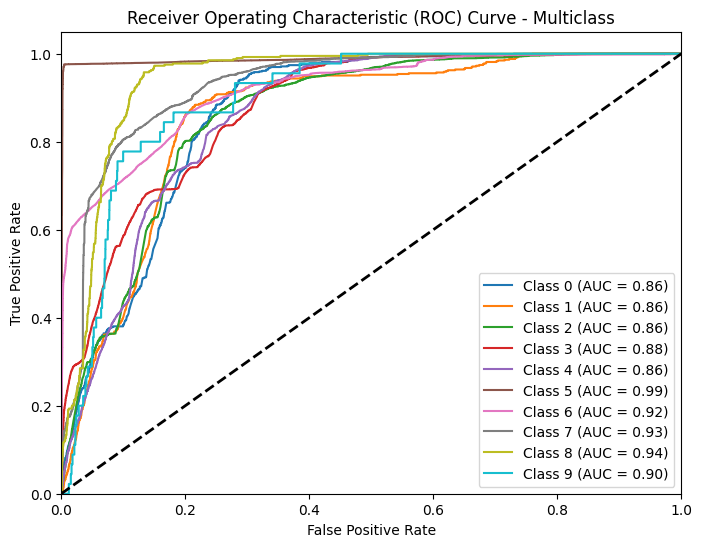

In [ ]:
# Binarize the output labels for multi-class classification
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))
y_test_bin = label_binarize(y_test, classes=np.unique(y_train))

# Train a classifier using One-vs-Rest strategy (Logistic Regression in this example)
classifier = OneVsRestClassifier(LogisticRegression())
y_score = classifier.fit(X_train, y_train_bin).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()  # False Positive Rate
tpr = dict()  # True Positive Rate
roc_auc = dict()  # Area Under the Curve (AUC)

n_classes = y_train_bin.shape[1]

# Calculate ROC curves and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--', linewidth=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Multiclass')
plt.legend(loc="lower right")
plt.show()


# **Decision boundary**

In [ ]:
# from mlxtend.plotting import plot_decision_regions
# plot_decision_regions(X_train, y_train.values, clf=lgr, legend=2)

# **Deep Learning Model**

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets
from torchsummary import summary
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [ ]:
# Determine the available device for computation (GPU, MPS, or CPU)
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

# Print the selected device
print(f"Using {device} device")


Using cuda device


In [ ]:
# transform = transforms.Compose([
#     transforms.ToTensor(),
# ])

**Data Loader Create for pytorce**

In [ ]:
# train_df_load=torch.utils.data.DataLoader(data_train,batch_size=64,shuffle=True)
# test_df_load=torch.utils.data.DataLoader(data_test,batch_size=64,shuffle=True)

In CNN, Binarization of labels is typically applied to convert multi-class labels into a format suitable for training the network.

In [ ]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_bin, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_bin, dtype=torch.float32)

# Create TensorDataset instances
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoader instances
batch_size = 64
train_df_load = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_df_load = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
print(len(train_df_load))
print(len(test_df_load))

3020
1007


# **Custom CNN Model**

Convolutional layers (conv layers) in neural networks are commonly used for processing grid-like data such as images.  If we want to work with numeric data that doesn't have a grid-like structure (e.g., time series, tabular data), using convolutional layers might not be the most appropriate choice. Instead, we can use a fully connected layer that is suitable for my data.

In [ ]:

# Define the neural network model

class CustomModel(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(CustomModel, self).__init__()
        self.fc1 = nn.Linear(27, 128)
        self.dropout1 = nn.Dropout(0.1)
        self.fc2 = nn.Linear(128, 256)
        self.dropout2 = nn.Dropout(0.1)
        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.1)
        self.fc4 = nn.Linear(128, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.dropout1(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout2(x)
        x = torch.relu(self.fc3(x))
        x = self.dropout3(x)
        x = self.fc4(x)
        x = self.softmax(x)
        return x
_features = 27
n_classes = 10

In [ ]:
model = CustomModel(input_dim=_features, output_dim=n_classes)
print(model)

CustomModel(
  (fc1): Linear(in_features=27, out_features=128, bias=True)
  (dropout1): Dropout(p=0.1, inplace=False)
  (fc2): Linear(in_features=128, out_features=256, bias=True)
  (dropout2): Dropout(p=0.1, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (dropout3): Dropout(p=0.1, inplace=False)
  (fc4): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


# **Model parameter**

In [ ]:
for name, param in model.named_parameters(): #model parameter name and values
    if param.requires_grad:
        print(name, param.data)

fc1.weight tensor([[-0.0898, -0.1200,  0.0636,  ...,  0.1784,  0.0865,  0.0859],
        [ 0.0687,  0.1882, -0.0067,  ..., -0.0401,  0.1046,  0.1746],
        [ 0.0268, -0.1722,  0.0217,  ...,  0.1111, -0.0722,  0.1363],
        ...,
        [-0.1361, -0.1289,  0.0594,  ...,  0.0362, -0.1698, -0.1731],
        [-0.1492,  0.1297,  0.0526,  ...,  0.0556,  0.0952,  0.0520],
        [-0.1012,  0.1222,  0.1638,  ...,  0.0456,  0.1169, -0.1466]])
fc1.bias tensor([ 0.1325, -0.0442, -0.0761,  0.0879, -0.0412, -0.0978, -0.1298,  0.1731,
         0.1711, -0.1755, -0.1700, -0.0879, -0.0379,  0.0836, -0.0332,  0.0524,
         0.0338,  0.0493, -0.0780,  0.1293,  0.0863,  0.1104,  0.1636,  0.1706,
        -0.1526, -0.0961,  0.0248,  0.1451,  0.0913,  0.1158,  0.0871, -0.0193,
         0.1241,  0.0468, -0.0754, -0.1448,  0.0549, -0.0818, -0.0945,  0.1353,
         0.0146, -0.1387,  0.1774,  0.1767, -0.0987,  0.1287,  0.1123, -0.1283,
        -0.1136,  0.1153, -0.1152,  0.0464,  0.0838, -0.0950, -0.0

# **Loss function Define**

In [ ]:
loss_fn = nn.CrossEntropyLoss() #for multiclass classification
optimizer=optim.SGD(model.parameters(),lr=0.01, weight_decay=0.01, momentum=.9) #L2 regularization #for penalty to the loss function
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer,gamma=0.1) #to adjust learning rate dynamically

In [ ]:
# Define the loss function and optimizer
criterion = nn.BCEWithLogitsLoss()  # Binary Cross-Entropy Loss for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

# **Training and Validation**

In [ ]:
lrs=[]
def train(model,optimizer,epoch):
    model.train()
    for batch, (data, target) in enumerate(train_df_load):
      output = model(data) #forward pass
      loss =loss_fn(output, target) #loss function
      loss.backward() #backward pass #to compute local gradient
      optimizer.step() #weight updation
      optimizer.zero_grad() #set zero to gradient

      lr=optimizer.param_groups[0]["lr"]

      if batch % 1000 == 0:
        print('Train Epoch: {} batch-{}\tLoss: {:.6f} Learning Rate: {}'.format(epoch, batch ,loss.item(),lr))
      lrs.append(lr)

In [ ]:
true_labels = [] #for confusion matrix
predicted_labels = [] #for confusion matrix

In [ ]:
# # Function for testing the model
# def test(model):
#     # Set the model to evaluation mode
#     model.eval()

#     # Disable gradient computation during testing
#     with torch.no_grad():
#         # Initialize counters for correct and total predictions
#         correct = 0
#         total = 0

#         # Loop through test data loader
#         for intrusion, labels in test_df_load:
#             # Forward pass to get model predictions
#             outputs = model(intrusion)

#             # Get the index of the maximum predicted value
#             _, predicted = torch.max(outputs, 1)

#             # Extend lists with true and predicted labels
#             true_labels.extend(labels.cpu().numpy())
#             predicted_labels.extend(predicted.cpu().numpy())

#             # Update total and correct counts
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()

#         # Calculate accuracy
#         accuracy = 100 * correct / total

#         # Print the accuracy of the network on the test data
#         print('Accuracy of the network on the test data: {} %'.format(accuracy))




# **Testing and evaluation**

In [ ]:
def test(model):

    model.eval() # Set the model to evaluation mode

    with torch.no_grad():# Disable gradient computation during testing
    # Initialize counters for correct and total predictions
        correct = 0
        total = 0
        for intrution, labels in test_df_load:  # Loop through test data loader

            outputs = model(intrution) # Forward pass to get model predictions
            _, predicted = torch.max(outputs, 0)# Get the index of the maximum predicted value

            true_labels.extend(labels.cpu().numpy())# Extend lists with true and predicted labels
            predicted_labels.extend(predicted.cpu().numpy())

            total += labels.size(0) # Update total and correct counts
            correct += (predicted == labels).sum().item()

        accuracy= 100 * correct / total# Calculate accuracy
        print('Accuracy of the network on the test data: {} %'.format(accuracy))# Print the accuracy of the network on the test data



In [ ]:
epochs=3
for epoch in range(1,epochs+1):
    train(model,optimizer,epoch)
    test(model)
    scheduler.step()

Train Epoch: 1 batch-0	Loss: 1.704426 Learning Rate: 0.001
Train Epoch: 1 batch-1000	Loss: 1.679891 Learning Rate: 0.001
Train Epoch: 1 batch-2000	Loss: 1.723185 Learning Rate: 0.001
Train Epoch: 1 batch-3000	Loss: 1.761654 Learning Rate: 0.001
Accuracy of the network on the test data: 76.50072183672519 %
Train Epoch: 2 batch-0	Loss: 1.714858 Learning Rate: 0.001
Train Epoch: 2 batch-1000	Loss: 1.678164 Learning Rate: 0.001
Train Epoch: 2 batch-2000	Loss: 1.648633 Learning Rate: 0.001
Train Epoch: 2 batch-3000	Loss: 1.651507 Learning Rate: 0.001
Accuracy of the network on the test data: 81.6436144615719 %
Train Epoch: 3 batch-0	Loss: 1.646979 Learning Rate: 0.001
Train Epoch: 3 batch-1000	Loss: 1.819956 Learning Rate: 0.001
Train Epoch: 3 batch-2000	Loss: 1.787440 Learning Rate: 0.001
Train Epoch: 3 batch-3000	Loss: 1.680045 Learning Rate: 0.001
Accuracy of the network on the test data: 89.73594746891445 %


In [ ]:
true_labels = [] #for confusion matrix
predicted_labels = [] #for confusion matrix

with torch.no_grad():
    correct = 0
    total = 0
    for data, labels in test_df_load:

        outputs = model(data)
        _, predicted = torch.max(outputs, 0)

        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(predicted.cpu().numpy())

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    accuracy= 100 * correct / total
    print('Accuracy of the network on the 10000 test data: {} %'.format(accuracy))


Accuracy of the network on the 10000 test data: 89.73594746891445 %
